## Observations and Insights

## Dependencies and starter code

Some analysis conclusions: 
    Capomulin and Ramicane are the only two drugs which appear to have decreased the Tumor volume. Although, 
as part of some extra analysis contained at the bottom of this file you'll see that the mice within these
two drug regimens were significantly smaller than the mice in any other regimen. That evidence combined with the line chart 
that plots the average weight to tumor volume of mice on the capomulin regimen and we have some more doubting evidence. 
The line plot shows correlation between average weight and tumor volume. Specifically, it shows the greater the average
weight of the mice the larger the final tumor volume. In other words, the drugs effectiveness is related to the weight 
of the mouse. Greater weight means less effective outcome. Interesting then that the mice for Capomulin and Ramicane are
so much smaller than the others, being that weight is correalated with the effectiveness of the drugs. 

    The last chart in this workbook contains a barchart of the percentage of deaths of mice during the treatment 
for each drug regimen. Capomulin and Ramicane had the lowest percentage by far. Most of the other drugs had death percentages
close to that of the Placebo, except for Propriva which may have killed a few mice. 



In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")


## Summary statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen = study.groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)':[np.mean, np.median, np.var, np.std, st.sem]
})
Regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E687570F60>],
      dtype=object)

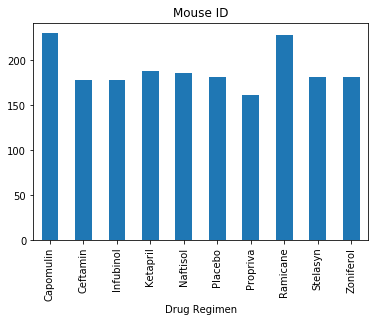

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
y_axis = study.groupby('Drug Regimen').count()['Mouse ID']
y_axis.plot.bar(subplots=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

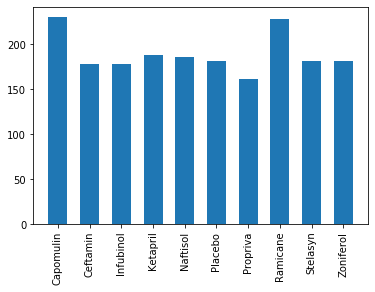

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(y_axis.index, y_axis, width=.6)
plt.xticks(rotation='vertical')


## Pie plots

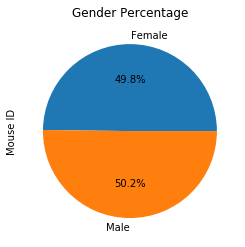

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = study.groupby('Sex').nunique()['Mouse ID']
gender_pie.plot(kind='pie', autopct="%1.1f%%")
plt.title('Gender Percentage')
plt.show()

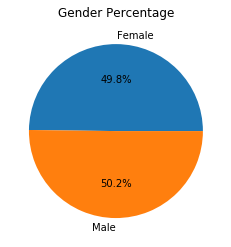

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(study.groupby('Sex').nunique()['Mouse ID'], labels=['Female', 'Male'], autopct ="%1.1f%%")
plt.title('Gender Percentage')
plt.show()

## Quartiles, outliers and boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the most 
# promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#create groupby for each drug
new_index = study.set_index(study['Drug Regimen'], drop=True)
Capomulin = new_index.loc['Capomulin'].groupby('Mouse ID').last()['Tumor Volume (mm3)']
Ramicane = new_index.loc['Ramicane'].groupby('Mouse ID').last()['Tumor Volume (mm3)']
Ceftamin = new_index.loc['Ceftamin'].groupby('Mouse ID').last()['Tumor Volume (mm3)']
Infubinol = new_index.loc['Infubinol'].groupby('Mouse ID').last()['Tumor Volume (mm3)']

#create a list that contains average volumes for each drug
vol = [Capomulin.mean(), Ramicane.mean(), Ceftamin.mean(), Infubinol.mean()]
drug_regimen = [Capomulin, Ramicane, Ceftamin, Infubinol]

#create empty list to append to
iqr_list = []
outliers_list = []
outliersid_list = []

#loop through the four drug regimens we wish to analyze
for drug in drug_regimen:
    
    cur_drug = drug
    
    #find quartiles and outliers and append to list
    quartiles = cur_drug.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    iqr_list.append(iqr)
    lower_bound = lowerq - (1.5*iqr) 
    upper_bound = upperq + (1.5*iqr)
    outliers = cur_drug[(cur_drug < lower_bound) | (cur_drug > upper_bound)]
    outliers_clean = [round(outliers, 2) for outliers in outliers]
    outliers_list.append([outliers_clean])
    outliers_id = [outliers for outliers in outliers.index]
    outliersid_list.append([outliers_id])
    
   
#create dataframe of analysis results   
db = pd.DataFrame({
        'Drug Regimen':['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol'],
        'Final Tumor Vol Av':vol,
        'IQR':iqr_list,
        'Outliers':outliers_list,
        'Outlier Mouse':outliersid_list
        })
db                       


,Drug Regimen,Final Tumor Vol Av,IQR,Outliers,Outlier Mouse
0,Capomulin,36.667568,7.781863,[[]],[[]]
1,Ramicane,36.191390,9.098537,[[]],[[]]
2,Ceftamin,57.753977,15.577752,[[]],[[]]
3,Infubinol,58.178246,11.477135,[[36.32]],[[c326]]


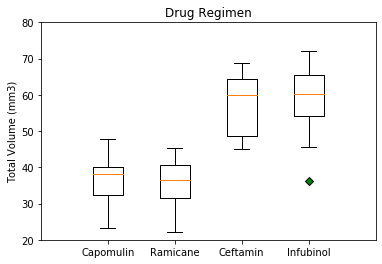

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_di = dict(markerfacecolor="g", marker='D')
data = [Capomulin, Ramicane, Ceftamin, Infubinol]
fig1, ax = plt.subplots()
ax.set_title('Drug Regimen')
ax.set_ylabel('Total Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol'])
ax.set_xlim(0, 5)
ax.set_ylim(20,80)
ax.boxplot(data, flierprops = green_di, whis=1.5)
plt.show()

## Line and scatter plots

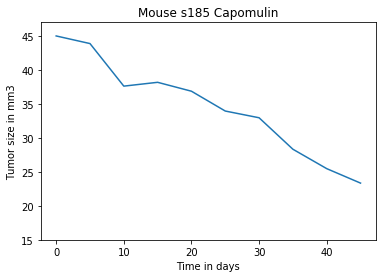

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
study.loc[study['Drug Regimen'] == 'Capomulin']
x_axis = study[(study['Mouse ID'] == 's185')].Timepoint
y_axis = study[(study['Mouse ID'] == 's185')]['Tumor Volume (mm3)']
plt.ylim(15, 47)
plt.title('Mouse s185 Capomulin')
plt.xlabel('Time in days')
plt.ylabel('Tumor size in mm3')
plt.plot(x_axis, y_axis)

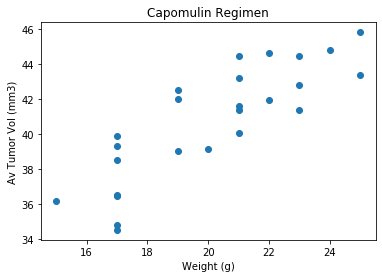

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = study.loc[study['Drug Regimen'] == 'Capomulin']
y = cap.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
x =  cap.groupby('Mouse ID').mean()['Weight (g)']
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
plt.scatter(x, y)

The correlation factor is 0.84
y = 0.95x + 21.55


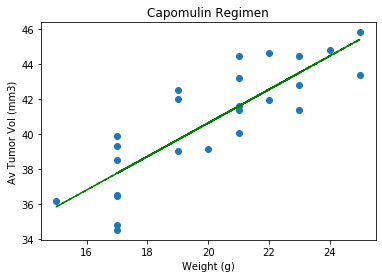

In [67]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#cor = st.pearsonr(x, y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
regress = x * slope + intercept
line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x, y)
plt.plot(x, regress, "g--")
plt.annotate(line_eq,(20, 36), fontsize=15, color='green')
plt.show()

--------------------------Extras------------------------------------

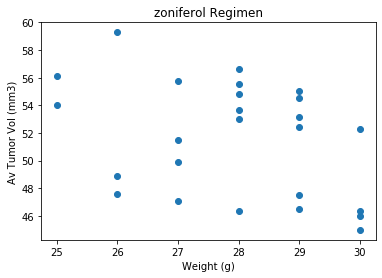

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for other regimens
#This plot shows an opposite result as the Capomulin Regimen
cap = study.loc[study['Drug Regimen'] == 'Zoniferol']
y = cap.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
x =  cap.groupby('Mouse ID').mean()['Weight (g)']
plt.title('zoniferol Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
plt.scatter(x, y)

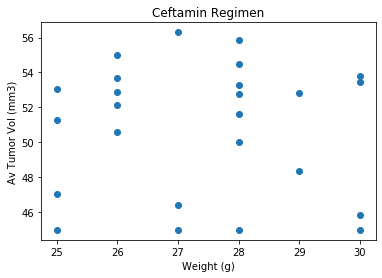

In [69]:
# Generate a scatter plot of mouse weight versus average tumor volume for the other regimens
#This plot shows no correlation between mouse weight and tumor volume for ceftamin regimen
cap = study.loc[study['Drug Regimen'] == 'Ceftamin']
y = cap.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
x =  cap.groupby('Mouse ID').mean()['Weight (g)']
plt.title('Ceftamin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
plt.scatter(x, y)

Text(0, 0.5, 'Average weight in grams')

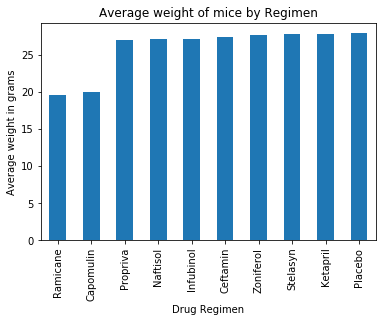

In [70]:
weight = study.groupby('Drug Regimen').mean()['Weight (g)'].sort_values()

#The two drugs; Capomulin & Ramicane, that seemed to have the best results, also have the lowest average weight of mice.
#Lower by a significant amount. This adds some doubt to the results. 
weight.plot(kind='bar')
plt.title('Average weight of mice by Regimen')
plt.ylabel('Average weight in grams')

Text(0, 0.5, '% of Mice deaths')

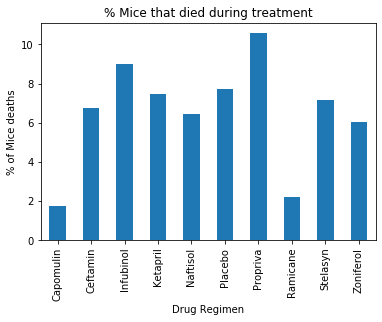

In [71]:
#lets explore mice deaths per regimen
deaths = pd.DataFrame(study.groupby(['Drug Regimen', 'Mouse ID']).count()['Timepoint'])
deaths = deaths[deaths['Timepoint'] < 10]
deaths = deaths.groupby('Drug Regimen').count()
deaths = deaths.rename(columns={'Timepoint':'Death Count'})
perc = (deaths['Death Count'] / study.groupby('Drug Regimen').count()['Mouse ID']) * 100

#plot mice deaths
perc.plot(kind='bar')
plt.title("% Mice that died during treatment")
plt.ylabel("% of Mice deaths")
